# **SUPPORT VECTOR MACHINE**
>Task 1: Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('mushroom.csv')
df.head()

In [ ]:
df.shape

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [7]:
df.dtypes

,0
Unnamed: 0,int64
cap_shape,object
cap_surface,object
cap_color,object
bruises,object
odor,object
gill_attachment,object
gill_spacing,object
gill_size,object
gill_color,object


In [8]:
df.isna().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [9]:
df.duplicated().sum()

np.int64(1024)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.rename(columns = {'Unnamed: 0':'Ids'},inplace=True)

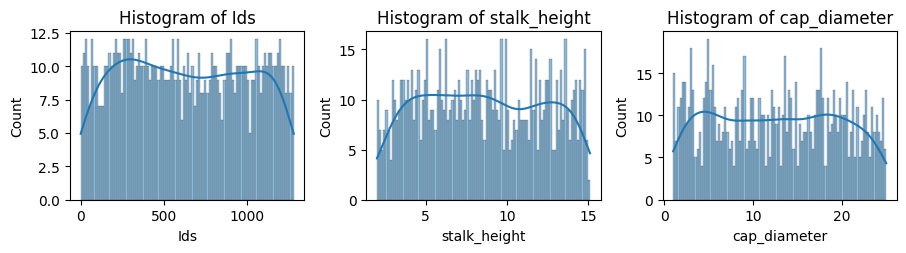

In [12]:
# Histogram for numerical features
numerical_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(12,9))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    plt.title(f'Histogram of {col}')
    sns.histplot(df[col],kde=True,bins=100,fill=True)
    plt.xlabel(f'{col}')

plt.tight_layout()
plt.show()


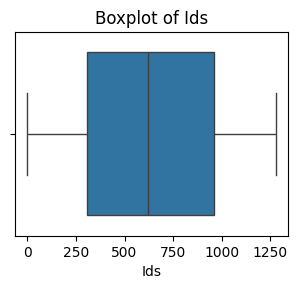

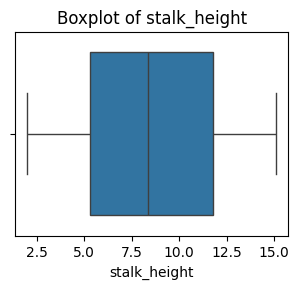

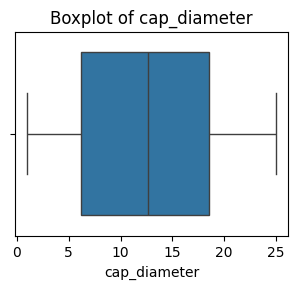

In [13]:
# Boxplots for numerical features
for i,col in enumerate(numerical_cols):
  plt.figure(figsize=(12,9))
  plt.subplot(3,3,i+1)
  sns.boxplot(data=df,x=col)
  plt.title(f'Boxplot of {col}')
  plt.show()

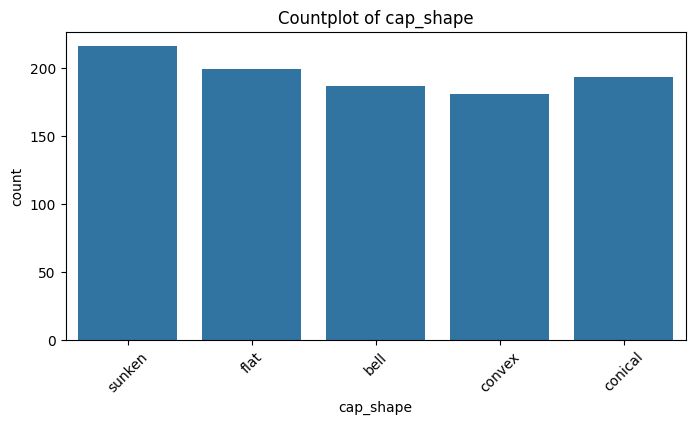

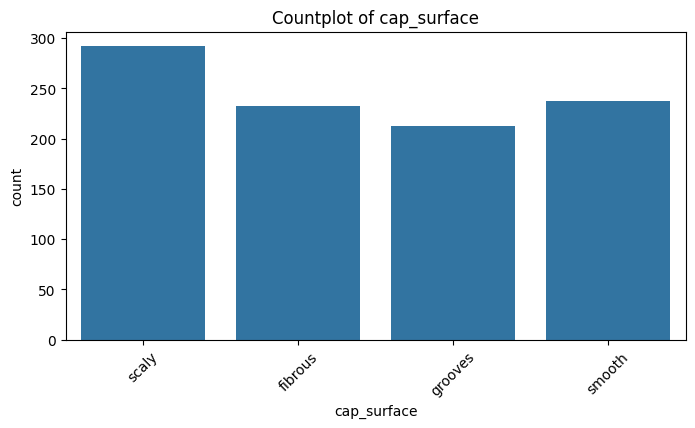

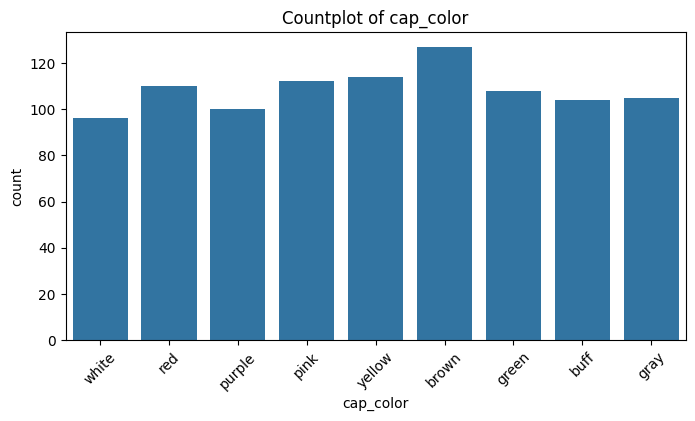

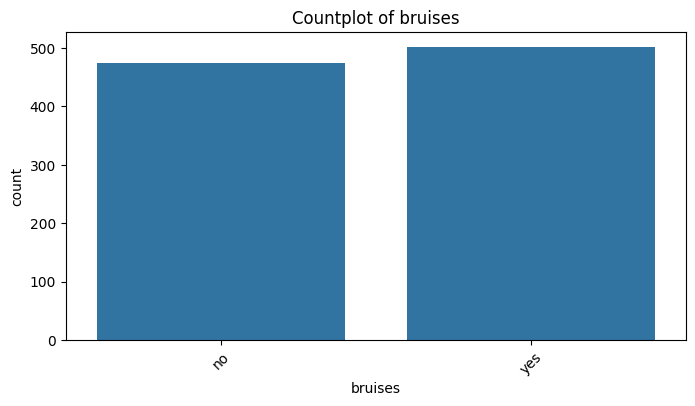

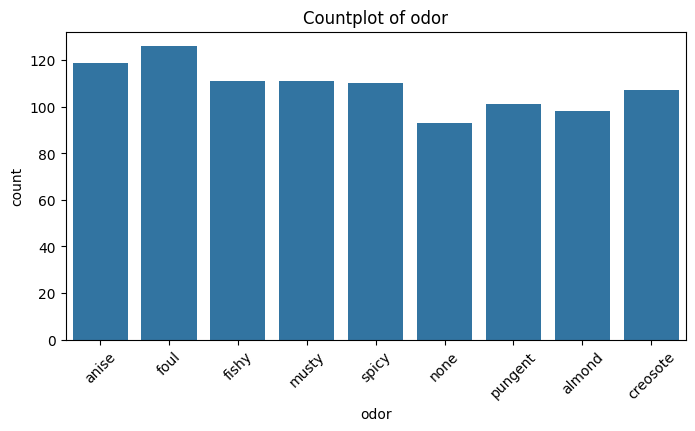

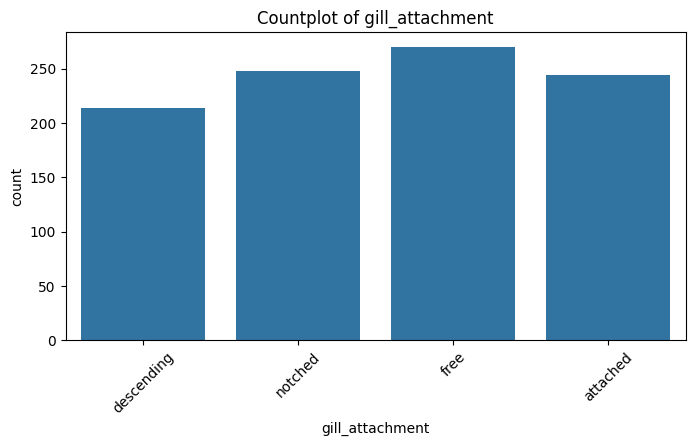

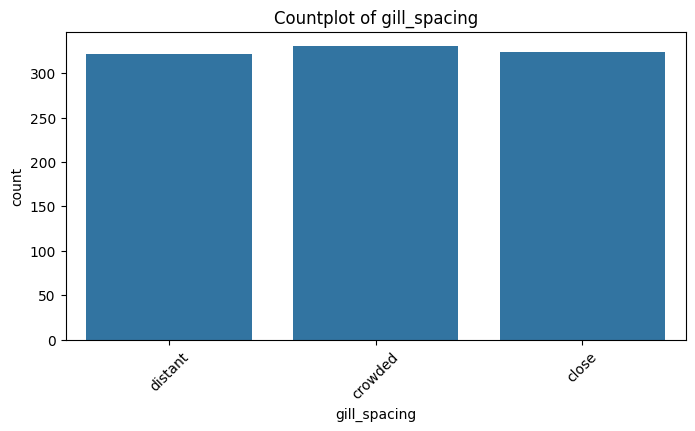

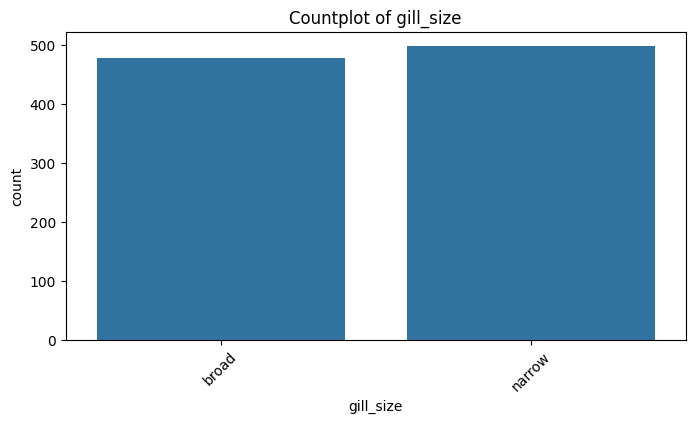

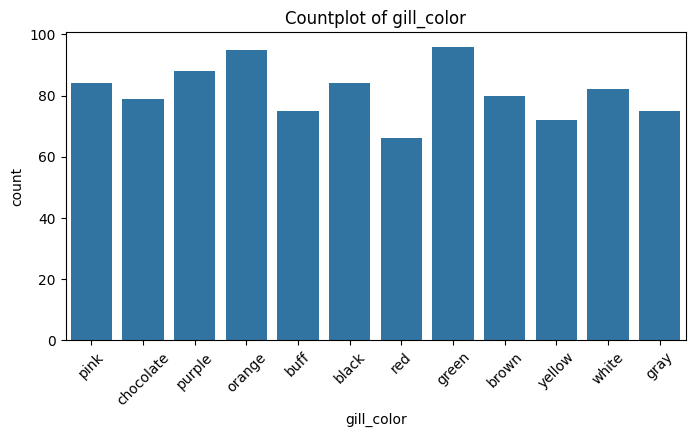

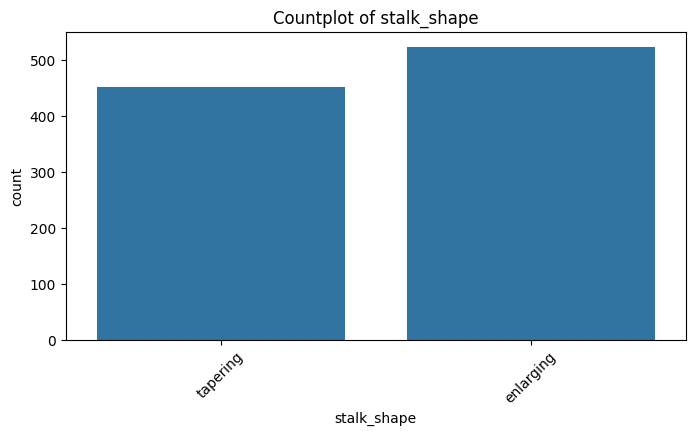

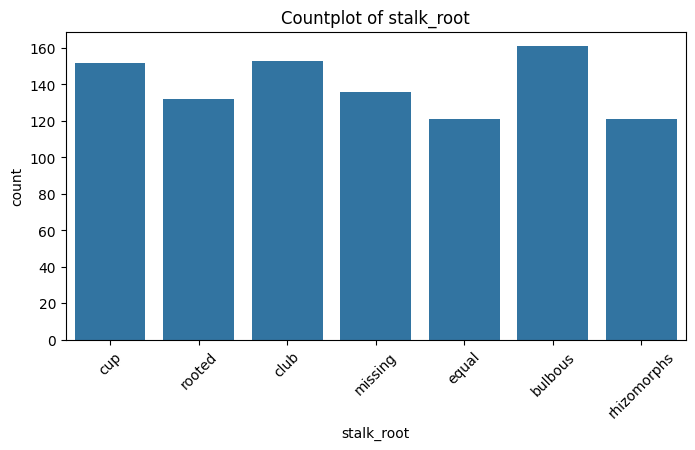

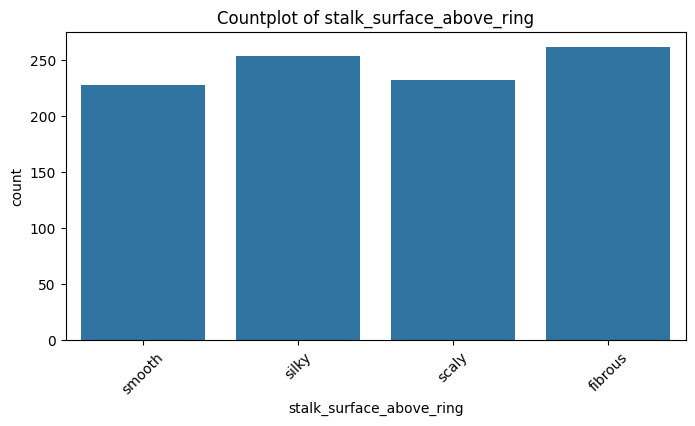

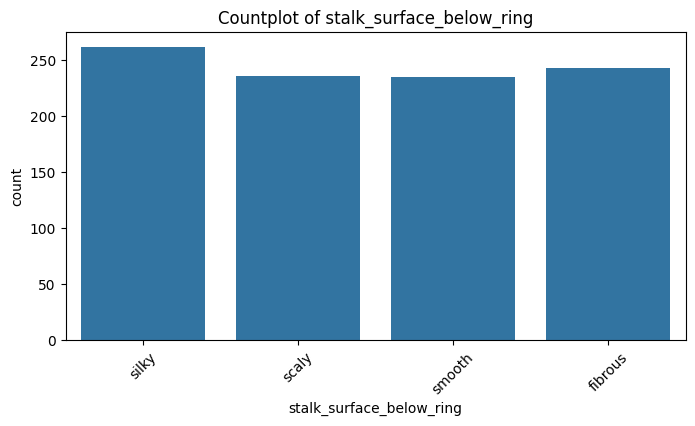

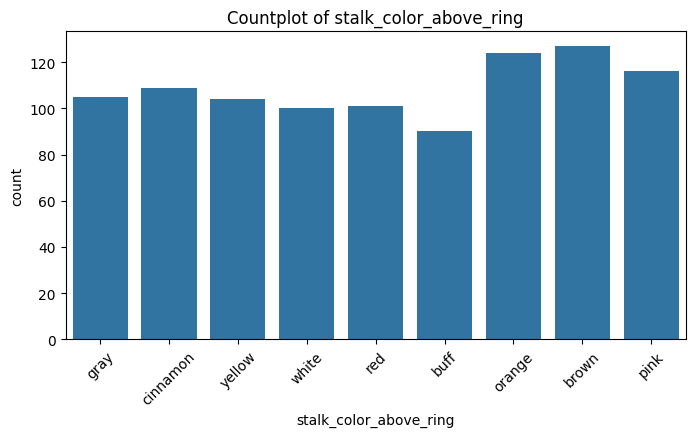

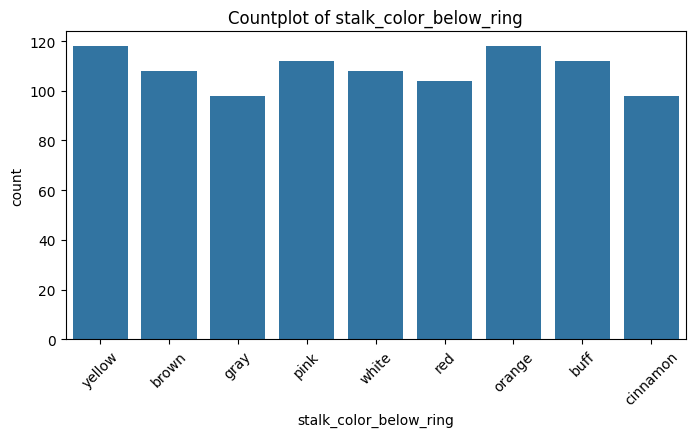

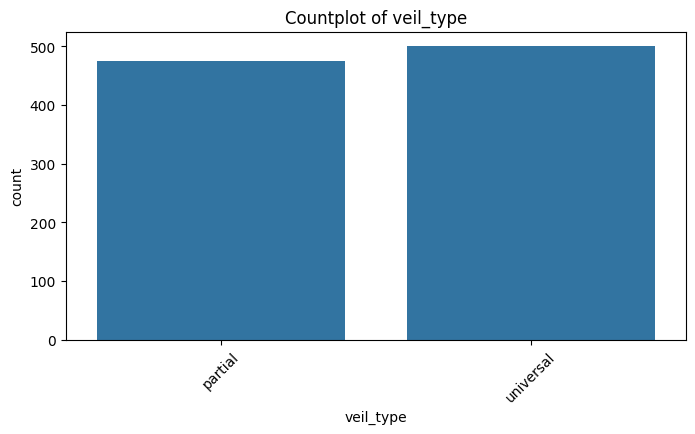

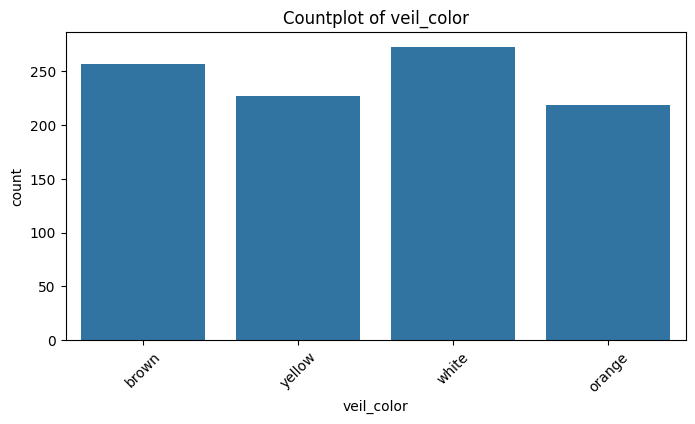

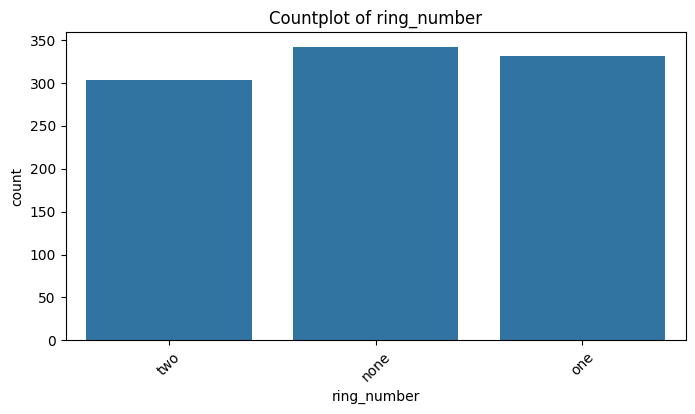

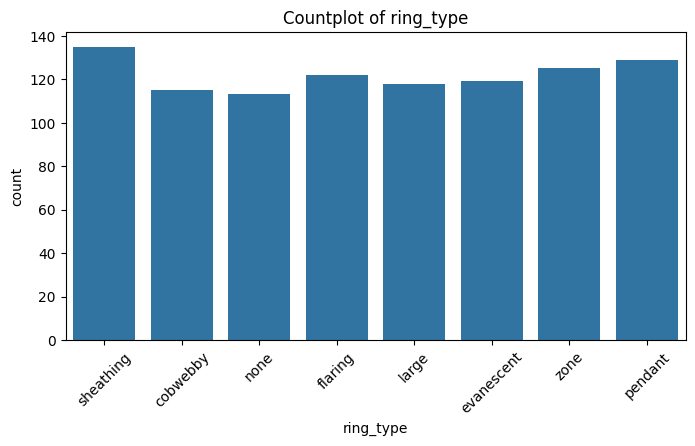

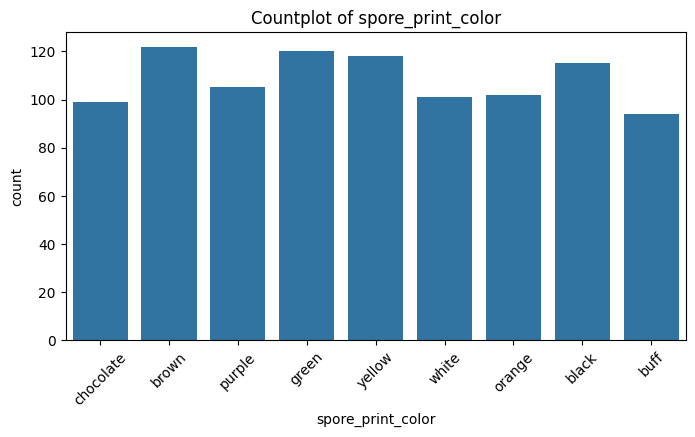

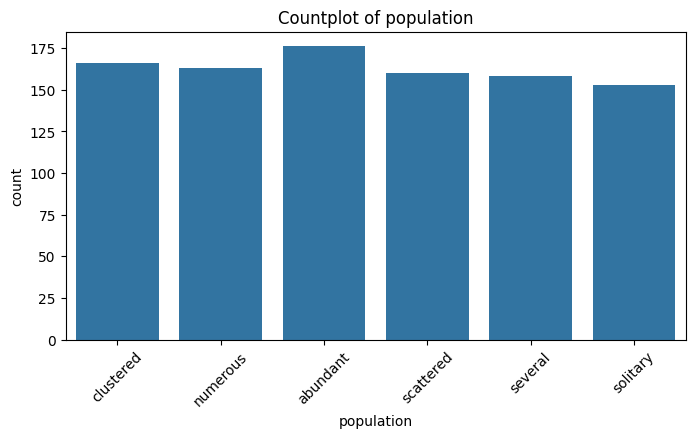

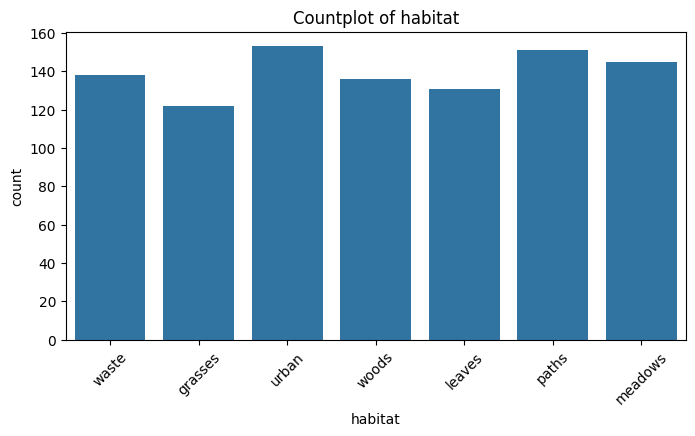

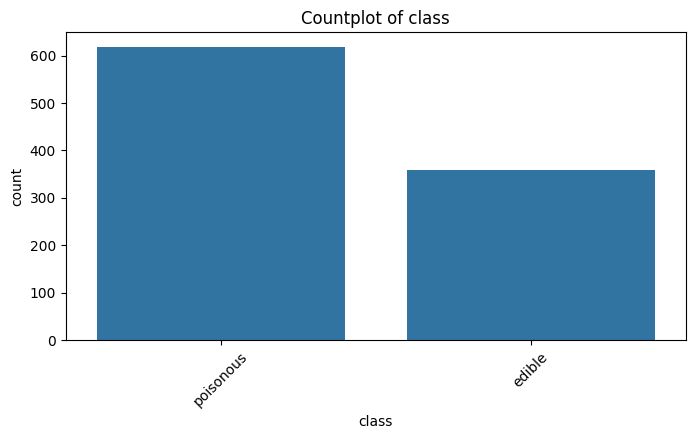

In [14]:
# Countplot for categorical features
categorical_cols = df.select_dtypes(include='object').columns
for i,col in enumerate(categorical_cols):
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

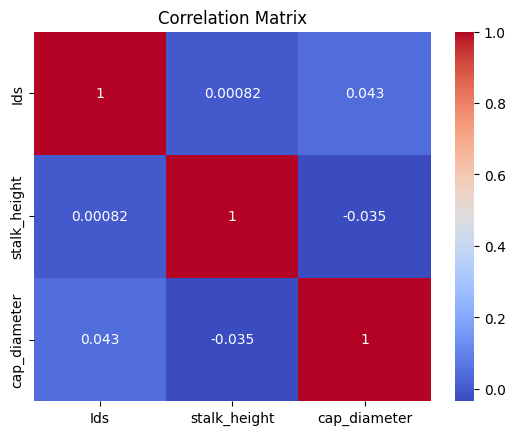

In [15]:
# Correlation matrix for numerical features
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


>Task 2: Data Preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le = LabelEncoder()

categorical_cols = df_encoded.select_dtypes(include='object').columns

for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()

,Ids,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [17]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['class'], axis=1)
y = df_encoded['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


>Task 3: Data Visualization

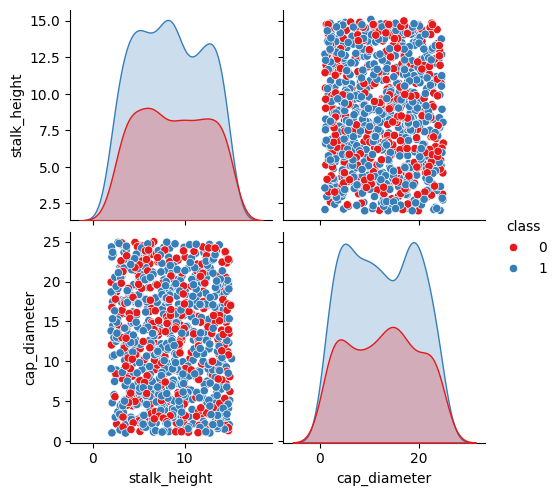

In [18]:
# Pairplot for numerical features with class hue
sns.pairplot(df_encoded, vars=['stalk_height', 'cap_diameter'], hue='class', palette='Set1')
plt.show()


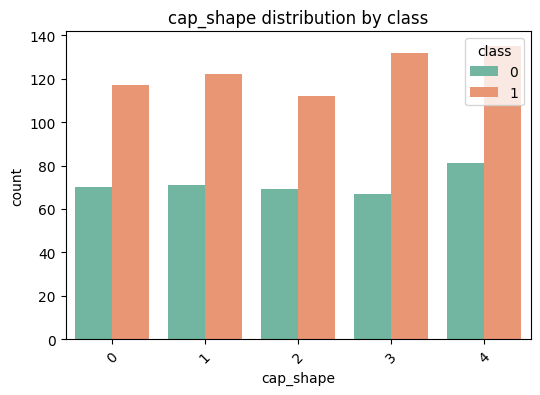

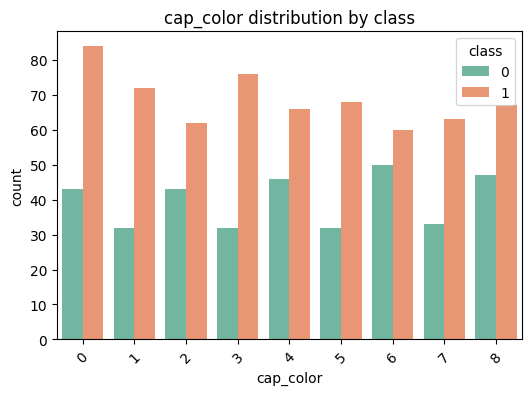

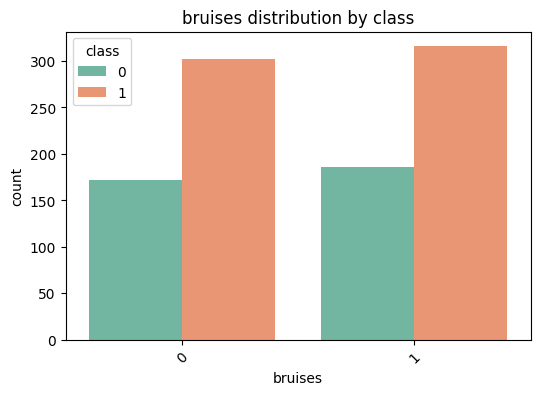

In [19]:
categorical_sample = ['cap_shape', 'cap_color', 'bruises']  # example few categorical columns

for col in categorical_sample:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_encoded, x=col, hue='class', palette='Set2')
    plt.title(f'{col} distribution by class')
    plt.xticks(rotation=45)
    plt.show()


/tmp/ipython-input-1698892778.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_encoded, x='class', palette='Set3')


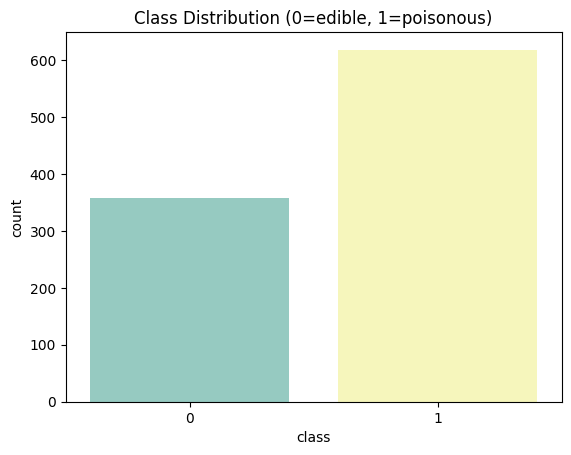

In [20]:
sns.countplot(data=df_encoded, x='class', palette='Set3')
plt.title('Class Distribution (0=edible, 1=poisonous)')
plt.show()

In [21]:
print(df_encoded['class'].value_counts())

class
1    618
0    358
Name: count, dtype: int64


>Task 4: SVM Implementation

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
from sklearn.preprocessing import StandardScaler

# Scale features (SVM works better with scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [25]:
y_pred = svm_model.predict(X_test_scaled)

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

y_pred = svm_model.predict(X_test_scaled)

print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print("Precision_score: ",precision_score(y_test,y_pred))
print("Recall_score: ",recall_score(y_test,y_pred))
print("F1_score: ",f1_score(y_test,y_pred))

Accuracy:  62.755102040816325
Precision_score:  0.6321243523316062
Recall_score:  0.9838709677419355
F1_score:  0.7697160883280757


>Task 5: Visualization of SVM Results

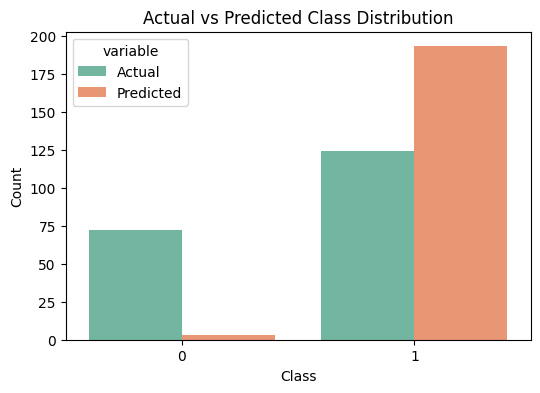

In [27]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Plot actual vs predicted counts
plt.figure(figsize=(6,4))
sns.countplot(x='value', hue='variable',
              data=pd.melt(results), palette='Set2')
plt.title("Actual vs Predicted Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


>Task 6: Parameter Tuning and Optimization

In [28]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto']        # Kernel coefficient
}

In [29]:
# Initialize SVM
svm = SVC(random_state=42)

In [30]:
# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

In [32]:
# Fit on training data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [33]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.6333333333333333


>Task 7: Comparison and Analysis

Kernel: linear, Accuracy: 0.6327
Kernel: poly, Accuracy: 0.6327
Kernel: rbf, Accuracy: 0.6276


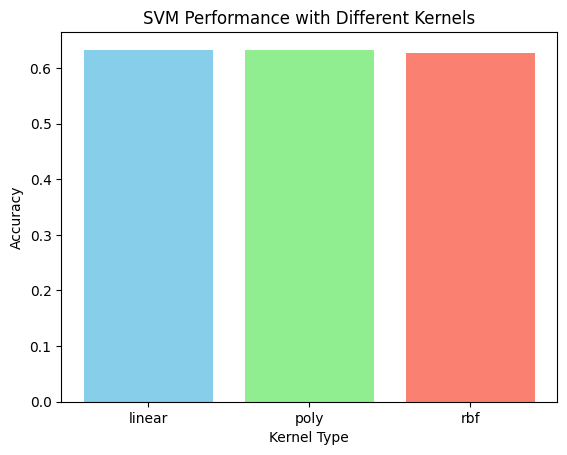

In [35]:
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel, C=1)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = acc
    print(f"Kernel: {kernel}, Accuracy: {acc:.4f}")

# Compare visually
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title("SVM Performance with Different Kernels")
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy")
plt.show()

#### 2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

**SVM Strengths (for Mushroom Dataset)**
- Achieved high accuracy since the dataset is mostly linearly separable.
- Works well even with many features after label encoding.
- Maximizes class separation with a clear decision boundary between edible and poisonous mushrooms.

**SVM Weaknesses**
- Handles categorical features poorly — encoding may lose natural relationships.
- Hard to interpret which mushroom attributes most influence predictions.
- Performance depends on kernel choice and may degrade if the data is non-linear.

#### 3.	Discuss practical implications of SVM in real-world classification tasks.

**Effective for complex decision boundaries:**
SVMs can classify data that isn’t linearly separable using kernels (e.g., in image recognition, bioinformatics, or text categorization).

**Performs well on smaller, high-dimensional datasets:**
SVMs are powerful when the number of features is large compared to the number of samples — common in fields like medical diagnosis or gene expression analysis.

**Useful where accuracy is critical:**
Because SVMs focus on maximizing the margin between classes, they are often used in fraud detection, spam filtering, and quality control tasks requiring reliable classification.